In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Thesis/Dataset/RAW/dataset_5secondWindow.csv')
df1


,id,time,activityrecognition#0,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.game_rotation_vector#mean,android.sensor.game_rotation_vector#min,...,sound#mean,sound#min,sound#max,sound#std,speed#mean,speed#min,speed#max,speed#std,target,user
0,16170,78,NaN,100,9.811476,9.758895,9.849411,0.014626,0.029340,0.029014,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,Still,U12
1,15871,145,NaN,100,9.939207,7.707437,17.146631,1.775944,0.999925,0.999903,...,89.200210,89.065143,89.335277,0.191013,16.539349,16.539349,16.539349,0.628595,Car,U12
2,16811,150,NaN,100,9.827178,9.804817,9.849262,0.011199,0.665215,0.665213,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,Still,U12
3,15831,105,NaN,77,9.673039,7.659674,12.304298,0.862553,0.996221,0.993781,...,87.470377,87.470377,87.470377,2.284186,17.739895,17.739895,17.739895,0.628595,Car,U12
4,876,77,NaN,100,9.993466,8.965621,10.891645,0.504117,0.563792,0.521799,...,89.770732,89.770732,89.770732,0.006389,9.000000,9.000000,9.000000,NaN,Car,U1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5888,14125,4,NaN,100,10.066610,4.564648,13.414389,3.373972,0.986319,0.974523,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Walking,U2
5889,19582,32,NaN,10,9.964271,8.768007,11.454213,0.665529,0.648602,0.648343,...,NaN,NaN,NaN,NaN,31.960054,31.960054,31.960054,NaN,Train,U3
5890,16178,86,NaN,100,9.812893,9.772881,9.862587,0.017633,0.024392,0.024081,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,Still,U12
5891,10973,199,NaN,100,9.831144,9.807347,9.874450,0.013485,0.481212,0.481209,...,NaN,NaN,NaN,NaN,1.090415,1.090415,1.090415,NaN,Still,U10


In [ ]:
column_lst1 = list(df1.columns)
mostly_null1 = []
partially_null1 = []
no_null1 = []

In [ ]:
for i in column_lst1:
    percentage1 = (df1[i].isnull().sum()*100)/5893
    if percentage1 >= 60:
        mostly_null1.append(i)
    elif df1[i].isnull().sum() > 0:
        partially_null1.append(i)
    elif df1[i].isnull().sum() == 0:
        no_null1.append(i)

    print('Feature Name:',i)
    print("Number of missing values: ",df1[i].isnull().sum(),"out of 5893")
    print("Missing percentage:"+str(percentage1)+"%")
    print()

Feature Name: id
Number of missing values:  0 out of 5893
Missing percentage:0.0%

Feature Name: time
Number of missing values:  0 out of 5893
Missing percentage:0.0%

Feature Name: activityrecognition#0
Number of missing values:  5893 out of 5893
Missing percentage:100.0%

Feature Name: activityrecognition#1
Number of missing values:  0 out of 5893
Missing percentage:0.0%

Feature Name: android.sensor.accelerometer#mean
Number of missing values:  0 out of 5893
Missing percentage:0.0%

Feature Name: android.sensor.accelerometer#min
Number of missing values:  0 out of 5893
Missing percentage:0.0%

Feature Name: android.sensor.accelerometer#max
Number of missing values:  0 out of 5893
Missing percentage:0.0%

Feature Name: android.sensor.accelerometer#std
Number of missing values:  0 out of 5893
Missing percentage:0.0%

Feature Name: android.sensor.game_rotation_vector#mean
Number of missing values:  799 out of 5893
Missing percentage:13.558459188868149%

Feature Name: android.sensor.gam

In [ ]:
if len(mostly_null1)+len(partially_null1)+len(no_null1) == len(column_lst1):
    print("True")
else:
    print("False")

True


In [ ]:
mostly_null1

['activityrecognition#0',
 'android.sensor.light#std',
 'android.sensor.pressure#mean',
 'android.sensor.pressure#min',
 'android.sensor.pressure#max',
 'android.sensor.pressure#std',
 'android.sensor.proximity#mean',
 'android.sensor.proximity#min',
 'android.sensor.proximity#max',
 'android.sensor.proximity#std',
 'android.sensor.step_counter#mean',
 'android.sensor.step_counter#min',
 'android.sensor.step_counter#max',
 'android.sensor.step_counter#std',
 'speed#std']

In [ ]:
for i in mostly_null1:
    df1 = df1.drop([i], axis = 1)

In [ ]:
df1 = df1.drop(['id'], axis = 1)

In [ ]:
for i in partially_null1:
    df1[i] = df1[i].fillna(0)

In [ ]:
newcolumns1 = list(df1.columns)

In [ ]:
for i in newcolumns1:
    
    print('Feature Name:',i)
    print("Number of missing values: ",df1[i].isnull().sum(),"out of 5893")
    print("Missing percentage:"+str(percentage1)+"%")
    print()

Feature Name: time
Number of missing values:  0 out of 5893
Missing percentage:0.0%

Feature Name: activityrecognition#1
Number of missing values:  0 out of 5893
Missing percentage:0.0%

Feature Name: android.sensor.accelerometer#mean
Number of missing values:  0 out of 5893
Missing percentage:0.0%

Feature Name: android.sensor.accelerometer#min
Number of missing values:  0 out of 5893
Missing percentage:0.0%

Feature Name: android.sensor.accelerometer#max
Number of missing values:  0 out of 5893
Missing percentage:0.0%

Feature Name: android.sensor.accelerometer#std
Number of missing values:  0 out of 5893
Missing percentage:0.0%

Feature Name: android.sensor.game_rotation_vector#mean
Number of missing values:  0 out of 5893
Missing percentage:0.0%

Feature Name: android.sensor.game_rotation_vector#min
Number of missing values:  0 out of 5893
Missing percentage:0.0%

Feature Name: android.sensor.game_rotation_vector#max
Number of missing values:  0 out of 5893
Missing percentage:0.0%


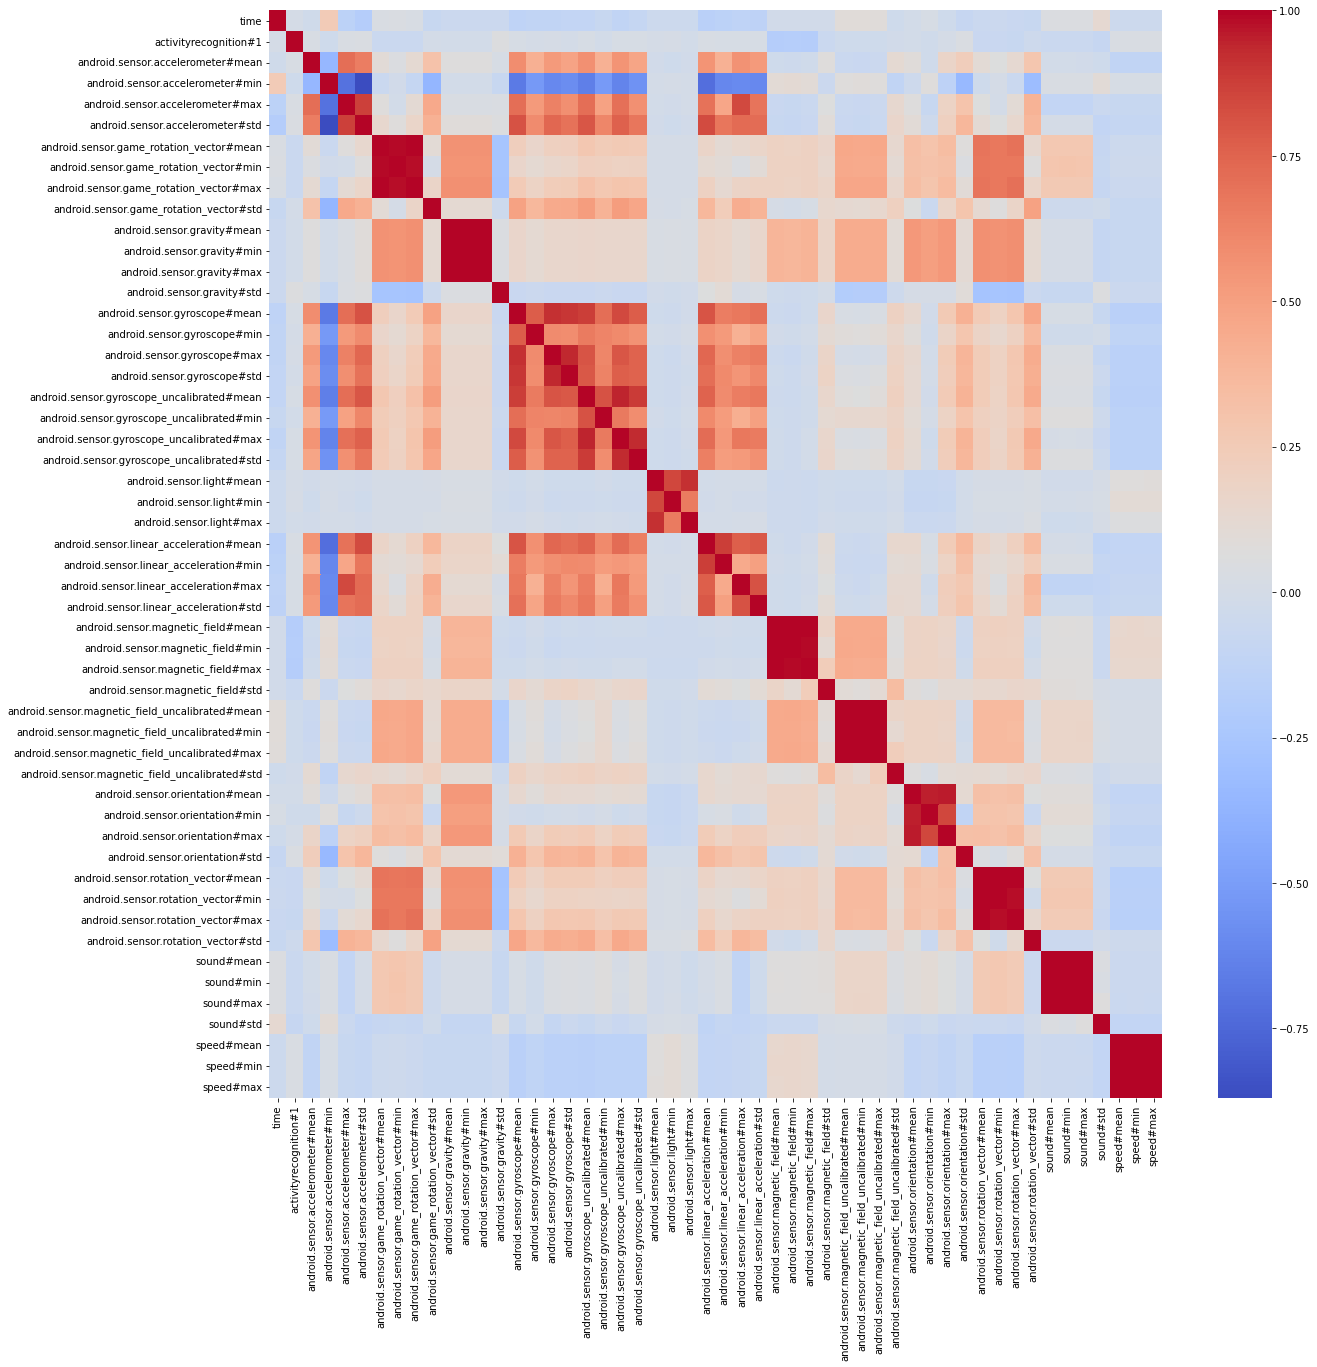

In [ ]:
corr = df1.corr()

plt.figure(figsize=(20,20))  
sns.heatmap(corr, annot = False, cmap = 'coolwarm')

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >= threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(df1, 0.7)
len(set(corr_features))

32

In [ ]:
df1 = df1.drop(corr_features,axis=1)
df1

,time,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.game_rotation_vector#mean,android.sensor.game_rotation_vector#std,android.sensor.gravity#mean,android.sensor.gravity#std,android.sensor.light#mean,android.sensor.magnetic_field#mean,...,android.sensor.magnetic_field_uncalibrated#std,android.sensor.orientation#mean,android.sensor.orientation#std,android.sensor.rotation_vector#mean,android.sensor.rotation_vector#std,sound#mean,sound#std,speed#mean,target,user
0,78,100,9.811476,9.758895,0.029340,0.000119,9.806650,4.780000e-07,0.000,57.099638,...,0.080899,354.286933,0.245676,0.050413,0.002109,0.000000,0.000000,0.000000,Still,U12
1,145,100,9.939207,7.707437,0.999925,0.000030,9.806624,6.470000e-07,0.000,29.351288,...,0.506105,332.695577,1.705816,0.999981,0.000026,89.200210,0.191013,16.539349,Car,U12
2,150,100,9.827178,9.804817,0.665215,0.000004,9.806650,2.820000e-07,2.000,29.904927,...,0.128945,74.752653,0.413704,0.610456,0.011312,0.000000,0.000000,0.000000,Still,U12
3,105,77,9.673039,7.659674,0.996221,0.003451,9.806638,2.120000e-06,0.000,37.836471,...,0.112446,373.556039,8.870011,0.998112,0.002788,87.470377,2.284186,17.739895,Car,U12
4,77,100,9.993466,8.965621,0.563792,0.064792,9.806650,2.640000e-07,30.000,78.375718,...,0.895633,193.201458,181.729455,0.322242,0.025608,89.770732,0.006389,9.000000,Car,U1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5888,4,100,10.066610,4.564648,0.986319,0.007186,9.806650,2.230000e-07,4.000,28.551588,...,23.640120,198.025171,0.858121,0.932682,0.008767,0.000000,0.000000,0.000000,Walking,U2
5889,32,10,9.964271,8.768007,0.648602,0.000331,9.806650,8.170000e-07,126.123,40.665641,...,4.265621,35.427524,1.794702,0.295905,0.018447,0.000000,0.000000,31.960054,Train,U3
5890,86,100,9.812893,9.772881,0.024392,0.000211,9.806650,4.290000e-07,0.000,57.026001,...,0.074212,354.182815,0.307487,0.051333,0.002659,0.000000,0.000000,0.000000,Still,U12
5891,199,100,9.831144,9.807347,0.481212,0.000002,9.806621,2.930000e-05,16.000,62.277008,...,0.235700,32.077433,0.000209,0.276348,0.000005,0.000000,0.000000,1.090415,Still,U10


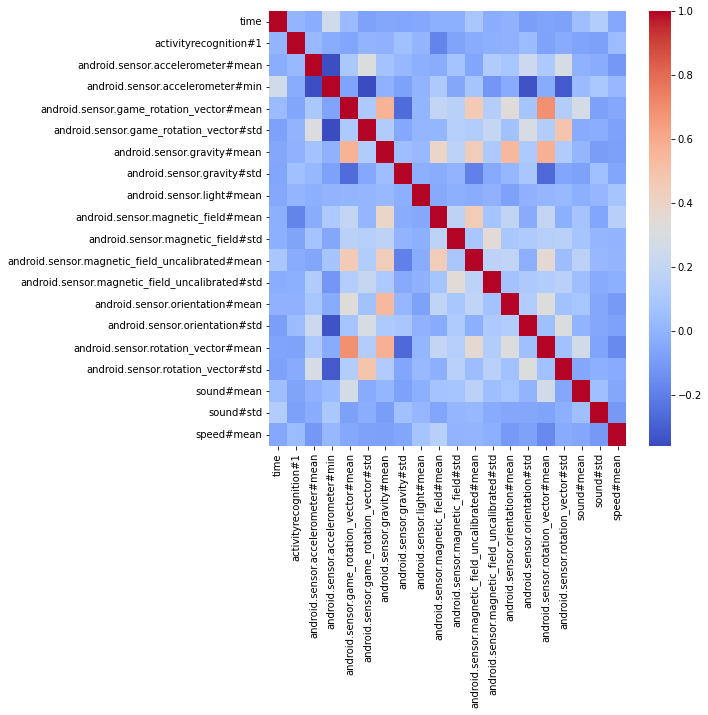

In [ ]:
corr = df1.corr()

plt.figure(figsize=(8,8))  
sns.heatmap(corr, annot = False, cmap = 'coolwarm')

In [ ]:
df1['target'] = df1['target'].map({'Bus':0,'Car':1,'Still':2,'Train':3,'Walking':4}) 

In [ ]:
df1 = df1.drop(['user'], axis = 1)
df1

,time,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.game_rotation_vector#mean,android.sensor.game_rotation_vector#std,android.sensor.gravity#mean,android.sensor.gravity#std,android.sensor.light#mean,android.sensor.magnetic_field#mean,...,android.sensor.magnetic_field_uncalibrated#mean,android.sensor.magnetic_field_uncalibrated#std,android.sensor.orientation#mean,android.sensor.orientation#std,android.sensor.rotation_vector#mean,android.sensor.rotation_vector#std,sound#mean,sound#std,speed#mean,target
0,78,100,9.811476,9.758895,0.029340,0.000119,9.806650,4.780000e-07,0.000,57.099638,...,51.363566,0.080899,354.286933,0.245676,0.050413,0.002109,0.000000,0.000000,0.000000,2
1,145,100,9.939207,7.707437,0.999925,0.000030,9.806624,6.470000e-07,0.000,29.351288,...,82.767760,0.506105,332.695577,1.705816,0.999981,0.000026,89.200210,0.191013,16.539349,1
2,150,100,9.827178,9.804817,0.665215,0.000004,9.806650,2.820000e-07,2.000,29.904927,...,55.695716,0.128945,74.752653,0.413704,0.610456,0.011312,0.000000,0.000000,0.000000,2
3,105,77,9.673039,7.659674,0.996221,0.003451,9.806638,2.120000e-06,0.000,37.836471,...,95.743821,0.112446,373.556039,8.870011,0.998112,0.002788,87.470377,2.284186,17.739895,1
4,77,100,9.993466,8.965621,0.563792,0.064792,9.806650,2.640000e-07,30.000,78.375718,...,157.429217,0.895633,193.201458,181.729455,0.322242,0.025608,89.770732,0.006389,9.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5888,4,100,10.066610,4.564648,0.986319,0.007186,9.806650,2.230000e-07,4.000,28.551588,...,56.502261,23.640120,198.025171,0.858121,0.932682,0.008767,0.000000,0.000000,0.000000,4
5889,32,10,9.964271,8.768007,0.648602,0.000331,9.806650,8.170000e-07,126.123,40.665641,...,85.122017,4.265621,35.427524,1.794702,0.295905,0.018447,0.000000,0.000000,31.960054,3
5890,86,100,9.812893,9.772881,0.024392,0.000211,9.806650,4.290000e-07,0.000,57.026001,...,51.317797,0.074212,354.182815,0.307487,0.051333,0.002659,0.000000,0.000000,0.000000,2
5891,199,100,9.831144,9.807347,0.481212,0.000002,9.806621,2.930000e-05,16.000,62.277008,...,270.495205,0.235700,32.077433,0.000209,0.276348,0.000005,0.000000,0.000000,1.090415,2


In [ ]:
X = df1.iloc[:,0:20] 
y = df1.iloc[:,20]

In [ ]:
X

,time,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.game_rotation_vector#mean,android.sensor.game_rotation_vector#std,android.sensor.gravity#mean,android.sensor.gravity#std,android.sensor.light#mean,android.sensor.magnetic_field#mean,android.sensor.magnetic_field#std,android.sensor.magnetic_field_uncalibrated#mean,android.sensor.magnetic_field_uncalibrated#std,android.sensor.orientation#mean,android.sensor.orientation#std,android.sensor.rotation_vector#mean,android.sensor.rotation_vector#std,sound#mean,sound#std,speed#mean
0,78,100,9.811476,9.758895,0.029340,0.000119,9.806650,4.780000e-07,0.000,57.099638,0.177549,51.363566,0.080899,354.286933,0.245676,0.050413,0.002109,0.000000,0.000000,0.000000
1,145,100,9.939207,7.707437,0.999925,0.000030,9.806624,6.470000e-07,0.000,29.351288,0.921547,82.767760,0.506105,332.695577,1.705816,0.999981,0.000026,89.200210,0.191013,16.539349
2,150,100,9.827178,9.804817,0.665215,0.000004,9.806650,2.820000e-07,2.000,29.904927,0.130851,55.695716,0.128945,74.752653,0.413704,0.610456,0.011312,0.000000,0.000000,0.000000
3,105,77,9.673039,7.659674,0.996221,0.003451,9.806638,2.120000e-06,0.000,37.836471,0.439461,95.743821,0.112446,373.556039,8.870011,0.998112,0.002788,87.470377,2.284186,17.739895
4,77,100,9.993466,8.965621,0.563792,0.064792,9.806650,2.640000e-07,30.000,78.375718,1.104361,157.429217,0.895633,193.201458,181.729455,0.322242,0.025608,89.770732,0.006389,9.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5888,4,100,10.066610,4.564648,0.986319,0.007186,9.806650,2.230000e-07,4.000,28.551588,0.381842,56.502261,23.640120,198.025171,0.858121,0.932682,0.008767,0.000000,0.000000,0.000000
5889,32,10,9.964271,8.768007,0.648602,0.000331,9.806650,8.170000e-07,126.123,40.665641,1.755636,85.122017,4.265621,35.427524,1.794702,0.295905,0.018447,0.000000,0.000000,31.960054
5890,86,100,9.812893,9.772881,0.024392,0.000211,9.806650,4.290000e-07,0.000,57.026001,0.209266,51.317797,0.074212,354.182815,0.307487,0.051333,0.002659,0.000000,0.000000,0.000000
5891,199,100,9.831144,9.807347,0.481212,0.000002,9.806621,2.930000e-05,16.000,62.277008,0.636157,270.495205,0.235700,32.077433,0.000209,0.276348,0.000005,0.000000,0.000000,1.090415


In [ ]:
y

0       2
1       1
2       2
3       1
4       1
       ..
5888    4
5889    3
5890    2
5891    2
5892    4
Name: target, Length: 5893, dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler   #min max scaling

scaler = MinMaxScaler(feature_range=(0,1))

scaler.fit(X)

X_scaled = scaler.transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(X_scaled,y,test_size=0.2)

In [ ]:
y_test.shape

(1179,)

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from itertools import cycle
def classification_check(model,X,y,x_train, x_test, y_train, y_test):                     
    #x_train, x_test, y_train, y_test =train_test_split(X,y,test_size=0.2)
    model1 = model.fit(x_train, y_train)
    print('Accuracy:', model.score(x_test,y_test))
    score=cross_val_score(model,X,y,cv=5)
    print(score)
    print('CV Score:',np.mean(score))
    y_pred1=model1.predict(x_test)
    cf=classification_report(y_test,y_pred1)
    print(cf)



In [ ]:
def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''
    
    sentiment_classes = ['Bus', 'Car', 'Still', 'Train', 'Walking']    #{'Bus':0,'Car':1,'Still':2,'Train':3,'Walking':4}
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.array(y_test), y_pred)
    # plot confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)
    

Accuracy: 0.9677692960135709
[0.95589483 0.95589483 0.96013571 0.96179966 0.96774194]
CV Score: 0.9602933912800552
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       225
           1       0.98      0.95      0.97       235
           2       0.96      0.98      0.97       231
           3       0.98      0.98      0.98       241
           4       0.96      0.97      0.96       247

    accuracy                           0.97      1179
   macro avg       0.97      0.97      0.97      1179
weighted avg       0.97      0.97      0.97      1179



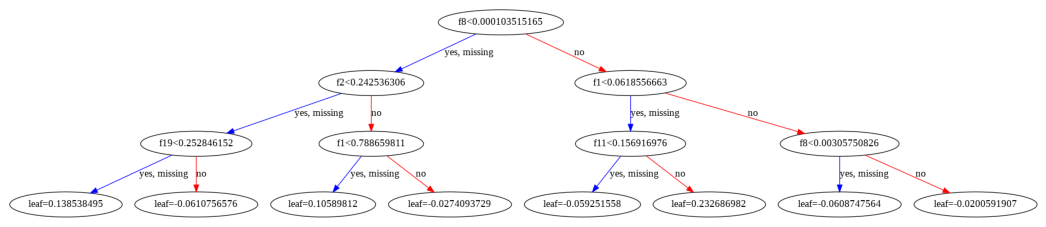

In [ ]:
from xgboost import XGBClassifier
from xgboost import plot_tree
model = XGBClassifier()
classification_check(model,X,y,x_train, x_test, y_train, y_test)
plot_tree(model)
plt.gcf().set_size_inches(18.5, 10.5)
plt.show()

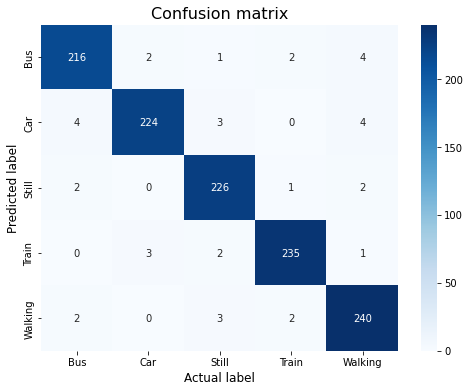

In [ ]:
plot_confusion_matrix(model, x_test, y_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classification_check(model,X,y,x_train, x_test, y_train, y_test)

Accuracy: 0.9219677692960135
[0.91772689 0.90754877 0.91942324 0.92699491 0.9286927 ]
CV Score: 0.9200773006965415
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       225
           1       0.92      0.94      0.93       235
           2       0.94      0.95      0.95       231
           3       0.94      0.92      0.93       241
           4       0.92      0.89      0.91       247

    accuracy                           0.92      1179
   macro avg       0.92      0.92      0.92      1179
weighted avg       0.92      0.92      0.92      1179



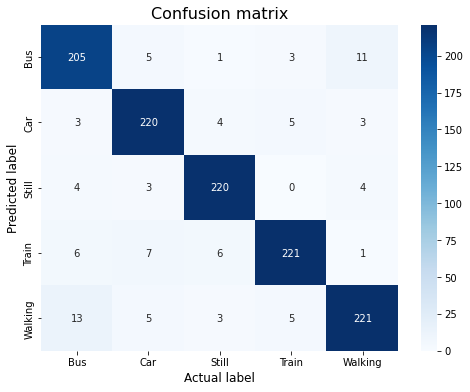

In [ ]:
plot_confusion_matrix(model, x_test, y_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classification_check(model,X,y,x_train, x_test, y_train, y_test)

Accuracy: 0.981340118744699
[0.97455471 0.97625106 0.97794741 0.98387097 0.9770798 ]
CV Score: 0.9779407889336739
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       225
           1       0.99      0.97      0.98       235
           2       0.97      0.98      0.98       231
           3       0.99      0.99      0.99       241
           4       0.96      0.99      0.97       247

    accuracy                           0.98      1179
   macro avg       0.98      0.98      0.98      1179
weighted avg       0.98      0.98      0.98      1179



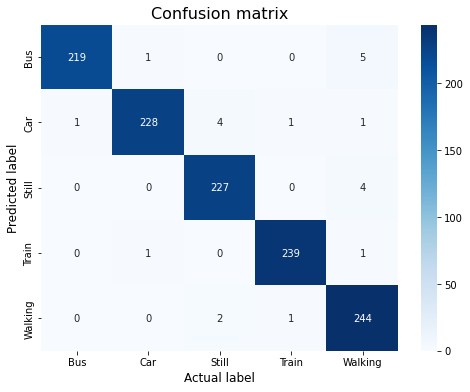

In [ ]:
plot_confusion_matrix(model, x_test, y_test)

In [ ]:
from sklearn import svm
model = svm.SVC()
classification_check(model,X,y,x_train, x_test, y_train, y_test)

Accuracy: 0.8396946564885496
[0.52926209 0.53774385 0.54622561 0.58404075 0.55348048]
CV Score: 0.5501505549147432
              precision    recall  f1-score   support

           0       0.78      0.92      0.84       225
           1       0.88      0.78      0.82       235
           2       0.85      0.81      0.83       231
           3       0.80      0.84      0.82       241
           4       0.91      0.86      0.88       247

    accuracy                           0.84      1179
   macro avg       0.84      0.84      0.84      1179
weighted avg       0.84      0.84      0.84      1179



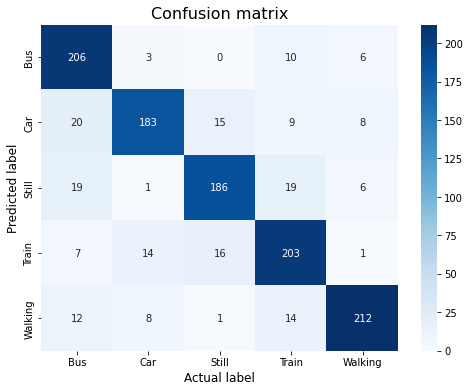

In [ ]:
plot_confusion_matrix(model, x_test, y_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 5)
classification_check(model,X,y,x_train, x_test, y_train, y_test)

Accuracy: 0.9406276505513147
[0.9245123  0.91263783 0.92620865 0.92444822 0.91426146]
CV Score: 0.9204136912090618
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       225
           1       0.96      0.92      0.94       235
           2       0.95      0.95      0.95       231
           3       0.95      0.95      0.95       241
           4       0.94      0.91      0.92       247

    accuracy                           0.94      1179
   macro avg       0.94      0.94      0.94      1179
weighted avg       0.94      0.94      0.94      1179



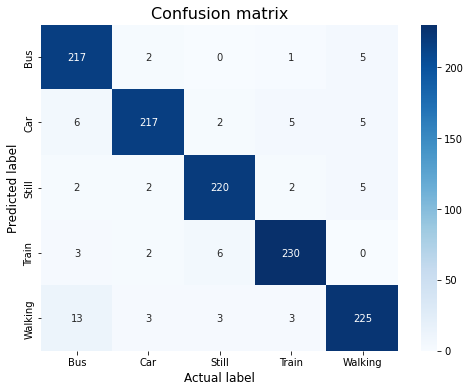

In [ ]:
plot_confusion_matrix(model, x_test, y_test)